# Switch or Stay?
## Task design: Agent vs. Agent
Xi Jia, June 2018

In this variant of the task, two agents (a "weak" and a "strong" agent) each hide behind a curtain and try to lift a box. We will manipulate the outcome of each agent's action, and measure which of the two unknown boxes the child chooses.

In [14]:
import random as rd
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [15]:
#Initializing variables

#Range of boxes
boxes = np.array([1,2,3,4,5])
prior_box = 1.0/len(boxes) # Prior

#Strengthes of agents
strength = {'A':1, 'B':4 }

#debug default
box = 4
agent = 'A'


In [16]:
strength.keys()

dict_keys(['B', 'A'])

## Probability of outcome, given agent's strength and box weight

Can the agent lift the box?

Deterministic function that's true if the agent's strength is greater than or equal to the weight of the box, false otherwise.

In [17]:
#Define helping funciton lift = T/F

def lift(box,agent):
    
    lift_success = strength[agent] >= box
    
    return lift_success

lift(box,agent)

False

Converts the output of the function above to a likelihood.

In [18]:
#Calculating Likelihood Out: p(Out|Box,Agent)

def likelihood_success(box,agent):
    
    p_success = lift(box, agent) * 1
    
    return p_success

likelihood_success(box, agent)

0

Posterior probability: given an observed outcome and strength, what's the likely weight of the box?

In [19]:
def posterior_box(agent, outcome):
    '''
    posterior_box: P(box | agent, outcome)
    box: box weight (int)
    agent: agent label (string, must be in strength.keys())
    outcome: True if agent succeeded, False if agent failed
    '''
    
    # Likelihood of outcome
    p_success = np.array([likelihood_success(b, agent) for b in boxes])
    p_outcome = p_success if outcome else 1-p_success
    
    # Posterior (unnormalized)
    joint_p = prior_box*p_outcome
    
    # Posterior (normalized)
    p_data = np.sum(joint_p)
    p_box = joint_p/p_data
    
    return p_box

posterior_box('A', True)

array([ 1.,  0.,  0.,  0.,  0.])

Expected value of the box:

In [20]:
def e_box(agent, outcome):
    
    p_box = posterior_box(agent, outcome)
    weighted_boxes = boxes*p_box
    
    expectation = np.sum(weighted_boxes)
    
    return expectation    

## Plotting

Prior:

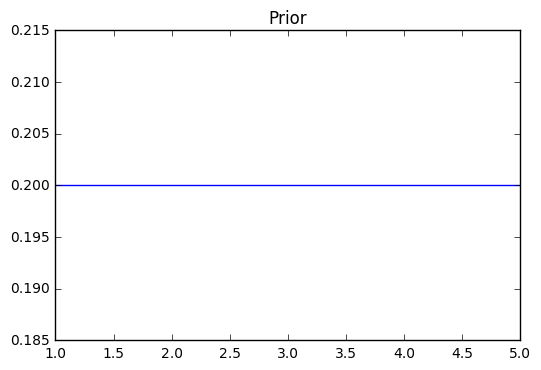

In [21]:
#Ploting Prior: p(Box)

plt.plot(boxes,uniform.pdf(boxes, loc = boxes[0], scale = len(boxes)))
plt.title('Prior')


Likelihood of success (p(Outcome | Box, Agent)

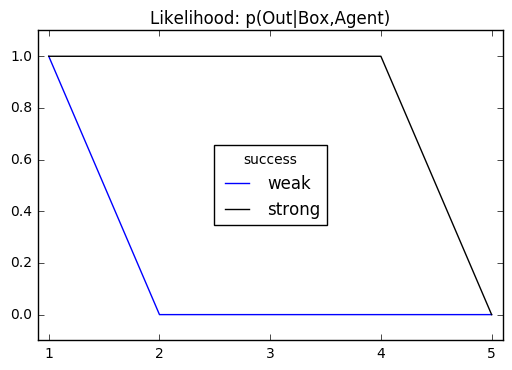

In [22]:
likelihood_weak = [likelihood_success(b, 'A') for b in boxes]
likelihood_strong = [likelihood_success(b, 'B') for b in boxes]  
            
fig,ax = plt.subplots()
ax.plot(boxes, likelihood_weak, 'b', label = 'weak')
ax.plot(boxes, likelihood_strong, 'k', label='strong')

legend = ax.legend(loc = 'best', title = 'success')

plt.axis([0.9, 5.1, -0.1, 1.1])
plt.title('Likelihood: p(Out|Box,Agent)')
plt.show()


Posterior distribution over possible values of the box (p(Box | Agent, Outcome))

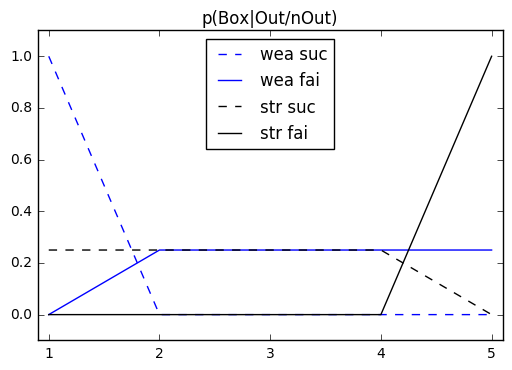

In [23]:
posterior_success_weak = posterior_box('A', True)
posterior_success_strong = posterior_box('B', True)
posterior_fail_weak = posterior_box('A', False)
posterior_fail_strong = posterior_box('B', False)


fig,ax = plt.subplots()         
ax.plot(boxes, posterior_success_weak,'b--', label = 'wea suc')
ax.plot(boxes, posterior_fail_weak,'b', label='wea fai')
ax.plot(boxes, posterior_success_strong,'k--', label = 'str suc')
ax.plot(boxes, posterior_fail_strong, 'k', label='str fai')

legend = ax.legend(loc = 'best')

plt.axis([0.9, 5.1, -0.1, 1.1])
plt.title('p(Box|Out/nOut)')

plt.show()

Expected value of the box, given the agent and outcome:

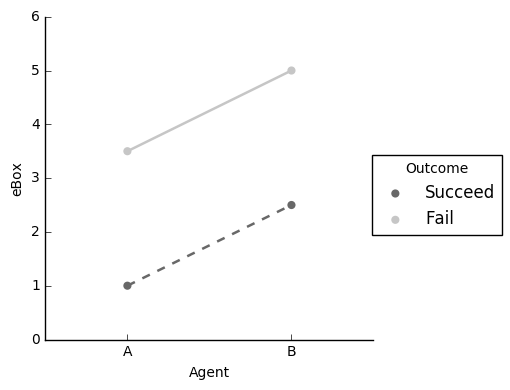

In [24]:
# Calculate EV for all agents and outcomes
ebox_data = [(agent, out, e_box(agent, out)) for agent in ['A', 'B'] for out in [True, False]]
ebox_df = pd.DataFrame(ebox_data, columns=['Agent', 'Outcome', 'eBox'])
ebox_df['Outcome'] = np.where(ebox_df['Outcome'], 'Succeed', 'Fail')

# Aesthetics
graycolors = sns.mpl_palette('Greys_r', 2)

# Generate plot
sns.factorplot(x='Agent', y='eBox', hue='Outcome', data=ebox_df,
               palette = graycolors, linestyles =['--', '-'])

## Scratch

In [ ]:
#Calculating Marginal Likelihood: p(Out|Agent)

def p_outgivenAgent(box,agent):
    p_outgvnAgent = strength[agent]/ len(boxes)
    return p_outgvnAgent

p_outgivenAgent(box,agent)


In [ ]:
#Calculating Posterior for successful cases: p(Box|Out)

def p_boxOut(box,agent):
    p_boxOut= p_box(box,agent)*p_outgivenBox(box,agent)/p_outgivenAgent(box,agent)
    return p_boxOut

p_boxOut(box,agent)
    

## Agent fails lifting the box

In [ ]:
#Calculating Likelihood: p(X Out|Box,Agent)

def p_nOutgivenBox(box,agent):
    p_nOutgvnBox = 1 if lift(box,agent) == False else 0
    return p_nOutgvnBox

p_nOutgivenBox(box,agent)

In [ ]:
#Calculating Marginal Likelihood: p(X Out|Agent)

def p_nOutgivenAgent(box,agent):
    p_nOutgvnAgent = (len(boxes) - strength[agent])/ len(boxes)
    return p_nOutgvnAgent

p_nOutgivenAgent(box,agent)

In [ ]:
#Calculating Posterior for failing cases: p(Box|nOut)

def p_boxnOut(box,agent):
    p_boxnOut= p_box(box,agent)*p_nOutgivenBox(box,agent)/p_nOutgivenAgent(box,agent)
    return p_boxnOut

p_boxnOut(box,agent)

## Graphs

In [ ]:
#Ploting Prior: p(Box)

x = np.linspace(boxes[0],boxes[-1],len(boxes))
#x: array([ 1.,  2.,  3.,  4.,  5.])

plt.plot(boxes,uniform.pdf(x, loc = boxes[0], scale = len(boxes)))
plt.title('Prior')

In [ ]:
#Ploting Likelihood: p(Out|Box,Agent)

# x = np.linspace(boxes[0],boxes[-1],len(boxes))
# x: array([ 1.,  2.,  3.,  4.,  5.])
y_w = []
y_s = []
for agent in strength.keys():
    for box in boxes:
        if agent == 'A':
            y_w.append(p_outgivenBox(box,agent))
        else: y_s.append(p_outgivenBox(box,agent))
            
            
fig,ax = plt.subplots()
ax.plot(x,y_w,'b--', label = 'weak')
ax.plot(x,y_s,'k--', label='strong')

legend = ax.legend(loc = 'best', title = 'success')

plt.axis([0, 6, 0, 1])
plt.title('Likelihood: p(Out|Box,Agent)')
plt.show()


In [ ]:
#Ploting Likelihood: p(X Out|Box,Agent)

y_nw = []
y_ns = []
for agent in strength.keys():
    for box in boxes:
        if agent == 'A':
            y_nw.append(p_nOutgivenBox(box,agent))
        else: y_ns.append(p_nOutgivenBox(box,agent))
            
            
fig,ax = plt.subplots()
ax.plot(x,y_nw,'b', label = 'weak')
ax.plot(x,y_ns,'k', label='strong')

legend = ax.legend(loc = 'best', title = 'failure')

plt.axis([0, 6, 0, 1])
plt.title('Likelihood: p(x Out|Box,Agent)')
plt.show()


In [ ]:

#Ploting everything together

fig,ax = plt.subplots()

ax.plot(x,y_w,'b--')
ax.plot(x,y_s,'k--')
ax.plot(x,y_nw,'b')
ax.plot(x,y_ns,'k')

#legend = ax.legend(loc = 'best')

plt.axis([0, 6, 0, 1])
plt.title('All Likelihood')
plt.show()




In [ ]:
#Ploting Posterior

y_ws = [] #weak success
y_wf = [] #weak fail
y_ss = [] #strong success
y_sf = [] #strong fail


for agent in strength.keys():
    for box in boxes:
        if agent == 'A':
            y_ws.append(p_boxOut(box,agent))
            y_wf.append(p_boxnOut(box,agent))
        else: 
            y_ss.append(p_boxOut(box,agent))
            y_sf.append(p_boxnOut(box,agent))
            

fig,ax = plt.subplots()         
ax.plot(x,y_ws,'b--', label = 'wea suc')
ax.plot(x,y_wf,'b', label='wea fai')
ax.plot(x,y_ss,'k--', label = 'str suc')
ax.plot(x,y_sf,'k', label='str fai')

legend = ax.legend(loc = 'best')

plt.title('p(Box|Out/nOut)')


plt.show()


        
            
            
